Import necessary libraries 

In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

# Handling Missing Values 
from sklearn.impute import SimpleImputer

# SMOTE 
from imblearn.over_sampling import SMOTE

# Standarlization 
from sklearn.preprocessing import StandardScaler

# For pipeline to avoid data leakage 
from imblearn.pipeline import Pipeline as ImbPipeline

# Cross Validation purposes 
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    GridSearchCV

)

# Training Model 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluator for testing 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay

Importing functions that will generate synthetic data 

Student contains name, year, student number.  
GrdSystem contains the individual grades per subject, the calculator for computing grades (Based on student handbook), and the indicator of the student status (Regular or Irregular).    
S_H_Survey will give the answers of the student, each factor have 3 questions 

In [2]:
from stdInfo import Student

student = Student(624)
student_info = student.std_info_dt()
print(student_info)

                    Name  Year Student Number
0         Michael Thomas     1       24427517
1        Michael Mcguire     4       21908695
2         Jonathan Smith     4       21620116
3           Jaime Phelps     2       23128726
4        Nicole Hamilton     3       22926109
..                   ...   ...            ...
619  Hailey Crawford PhD     2       23052132
620        Ryan Randolph     3       22373269
621       Caitlin Torres     2       23560694
622     Yolanda Stephens     1       24256396
623       Kenneth Flores     2       23494422

[624 rows x 3 columns]


In [3]:
from stdGrade import GrdSystem

students = GrdSystem(624)
student_grades = students.overall_dt_stdGrades()
print(student_grades)

                    Name  Year Student Number  Subject_1  Subject_2  \
0         Michael Thomas     1       24427517       1.25       3.00   
1        Michael Mcguire     4       21908695       1.75       2.00   
2         Jonathan Smith     4       21620116       1.00       1.75   
3           Jaime Phelps     2       23128726       1.25       2.50   
4        Nicole Hamilton     3       22926109       1.25       3.00   
..                   ...   ...            ...        ...        ...   
619  Hailey Crawford PhD     2       23052132       2.00       2.25   
620        Ryan Randolph     3       22373269       2.50       4.00   
621       Caitlin Torres     2       23560694       4.00       2.00   
622     Yolanda Stephens     1       24256396       2.50       2.75   
623       Kenneth Flores     2       23494422       1.00       1.00   

     Subject_3  Subject_4  Subject_5     Status  Subject_6  Subject_7  \
0         2.25       1.50       1.00    Regular        NaN        NaN   
1

In [4]:
from StudyHbtsSurvey import S_H_Survey

survey = S_H_Survey(624, Total_respondents= 624, Respondents_ans=531)
student_survey = survey.std_info_and_survey()
print(student_survey)

                    Name  Year Student Number Homework_Question_1  \
0         Michael Thomas     1       24427517      Strongly Agree   
1        Michael Mcguire     4       21908695            Disagree   
2         Jonathan Smith     4       21620116   Strongly Disagree   
3           Jaime Phelps     2       23128726   Strongly Disagree   
4        Nicole Hamilton     3       22926109            Disagree   
..                   ...   ...            ...                 ...   
619  Hailey Crawford PhD     2       23052132                 NaN   
620        Ryan Randolph     3       22373269                 NaN   
621       Caitlin Torres     2       23560694                 NaN   
622     Yolanda Stephens     1       24256396                 NaN   
623       Kenneth Flores     2       23494422                 NaN   

    Homework_Question_2 Homework_Question_3 Time Allocation_Question_1  \
0              Disagree               Agree             Strongly Agree   
1              Disagree

Merging dataframes

In [5]:
merged_data = pd.merge(student_grades, student_survey, how= "left", on= ["Student Number", "Name", "Year"])
merged_data

,Name,Year,Student Number,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Status,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers Consultation_Question_1,Teachers Consultation_Question_2,Teachers Consultation_Question_3
0,Michael Thomas,1,24427517,1.25,3.00,2.25,1.50,1.00,Regular,NaN,NaN,NaN,1.84,0,Strongly Agree,Disagree,Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Agree,Strongly Agree,Agree,Strongly Disagree,Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree
1,Michael Mcguire,4,21908695,1.75,2.00,2.75,3.00,1.50,Regular,NaN,NaN,NaN,2.20,0,Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Agree,Disagree,Strongly Agree,Strongly Disagree,Agree,Disagree,Strongly Disagree,Disagree,Agree,Strongly Agree,Disagree,Disagree,Strongly Disagree,Strongly Disagree
2,Jonathan Smith,4,21620116,1.00,1.75,2.50,1.75,2.00,Regular,NaN,NaN,NaN,1.80,0,Strongly Disagree,Agree,Strongly Disagree,Disagree,Disagree,Agree,Agree,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree
3,Jaime Phelps,2,23128726,1.25,2.50,4.00,5.00,1.00,Irregular,2.75,2.25,1.00,2.52,2,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Disagree,Strongly Agree,Disagree,Agree,Disagree,Agree,Strongly Disagree,Agree
4,Nicole Hamilton,3,22926109,1.25,3.00,4.00,1.25,2.00,Irregular,4.00,2.25,NaN,2.54,2,Disagree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Agree,Disagree,Agree,Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Hailey Crawford PhD,2,23052132,2.00,2.25,1.50,3.00,2.25,Regular,1.50,2.25,1.00,1.97,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
620,Ryan Randolph,3,22373269,2.50,4.00,1.50,1.50,3.00,Irregular,1.00,2.75,NaN,2.32,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
621,Caitlin Torres,2,23560694,4.00,2.00,5.00,2.25,1.75,Irregular,4.00,1.50,5.00,3.15,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
622,Yolanda Stephens,1,24256396,2.50,2.75,1.25,5.00,5.00,Irregular,NaN,NaN,NaN,3.36,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


Understanding dataframes 

In [6]:
merged_data.shape

(624, 35)

In [7]:
merged_data.dtypes

Name                                   object
Year                                    int64
Student Number                         object
Subject_1                             float64
Subject_2                             float64
Subject_3                             float64
Subject_4                             float64
Subject_5                             float64
Status                                 object
Subject_6                             float64
Subject_7                             float64
Subject_8                             float64
Final Grade                           float64
Subjects Failed                         int64
Homework_Question_1                    object
Homework_Question_2                    object
Homework_Question_3                    object
Time Allocation_Question_1             object
Time Allocation_Question_2             object
Time Allocation_Question_3             object
Reading and Note Taking_Question_1     object
Reading and Note Taking_Question_2

In [8]:
merged_data.describe()

,Year,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,308.000000,308.000000,144.000000,624.000000,624.000000
mean,2.597756,2.497596,2.430288,2.480369,2.532452,2.479567,2.504058,2.383929,2.421875,2.478317,1.141026
std,1.120391,1.166597,1.123471,1.163981,1.169798,1.122727,1.166592,1.122995,1.237338,0.460393,0.954494
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.350000,0.000000
25%,2.000000,1.500000,1.500000,1.500000,1.750000,1.500000,1.500000,1.500000,1.500000,2.120000,0.000000
50%,3.000000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.450000,1.000000
75%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.750000,3.000000,2.800000,2.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.020000,5.000000


Cleaning the data 

In [9]:
#Checking Duplicates 

merged_data.duplicated().sum()

0

In [10]:
#Checking null values 

merged_data.isnull().sum()

Name                                    0
Year                                    0
Student Number                          0
Subject_1                               0
Subject_2                               0
Subject_3                               0
Subject_4                               0
Subject_5                               0
Status                                  0
Subject_6                             316
Subject_7                             316
Subject_8                             480
Final Grade                             0
Subjects Failed                         0
Homework_Question_1                    93
Homework_Question_2                    93
Homework_Question_3                    93
Time Allocation_Question_1             93
Time Allocation_Question_2             93
Time Allocation_Question_3             93
Reading and Note Taking_Question_1     93
Reading and Note Taking_Question_2     93
Reading and Note Taking_Question_3     93
Study Period Procedures_Question_1

In [11]:
#Dropping unnecessary columns 

merged_data.columns 

Index(['Name', 'Year', 'Student Number', 'Subject_1', 'Subject_2', 'Subject_3',
       'Subject_4', 'Subject_5', 'Status', 'Subject_6', 'Subject_7',
       'Subject_8', 'Final Grade', 'Subjects Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time Allocation_Question_1', 'Time Allocation_Question_2',
       'Time Allocation_Question_3', 'Reading and Note Taking_Question_1',
       'Reading and Note Taking_Question_2',
       'Reading and Note Taking_Question_3',
       'Study Period Procedures_Question_1',
       'Study Period Procedures_Question_2',
       'Study Period Procedures_Question_3', 'Written Works_Question_1',
       'Written Works_Question_2', 'Written Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers Consultation_Question_1',
       'Teachers Consultation_Question_2', 'Teachers Consultation_Question_3'],
      dtype='object')

In [12]:
merged_data = merged_data[[#'Name', 
        'Year', 
    #    'Student Number', 
    #    'Subject_1', 'Subject_2', 'Subject_3',
    #    'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
    #    'Subject_8', 
       'Final Grade', 'Subjects Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time Allocation_Question_1', 'Time Allocation_Question_2',
       'Time Allocation_Question_3', 'Reading and Note Taking_Question_1',
       'Reading and Note Taking_Question_2',
       'Reading and Note Taking_Question_3',
       'Study Period Procedures_Question_1',
       'Study Period Procedures_Question_2',
       'Study Period Procedures_Question_3', 'Written Works_Question_1',
       'Written Works_Question_2', 'Written Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers Consultation_Question_1',
       'Teachers Consultation_Question_2', 'Teachers Consultation_Question_3', 'Status']].copy()

In [13]:
merged_data.head()

,Year,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers Consultation_Question_1,Teachers Consultation_Question_2,Teachers Consultation_Question_3,Status
0,1,1.84,0,Strongly Agree,Disagree,Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Agree,Strongly Agree,Agree,Strongly Disagree,Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Regular
1,4,2.20,0,Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Agree,Disagree,Strongly Agree,Strongly Disagree,Agree,Disagree,Strongly Disagree,Disagree,Agree,Strongly Agree,Disagree,Disagree,Strongly Disagree,Strongly Disagree,Regular
2,4,1.80,0,Strongly Disagree,Agree,Strongly Disagree,Disagree,Disagree,Agree,Agree,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Regular
3,2,2.52,2,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Disagree,Strongly Agree,Disagree,Agree,Disagree,Agree,Strongly Disagree,Agree,Irregular
4,3,2.54,2,Disagree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Agree,Disagree,Agree,Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree,Irregular


In [14]:
# Renaming Columns 

merged_data = merged_data.rename(columns = { 
    "Final Grade" : "Final_Grade",
    "Subjects Failed" : "Subjects_Failed",
    "Time Allocation_Question_1" : "Time_Allocation_Question_1",
    "Time Allocation_Question_2" : "Time_Allocation_Question_2",
    "Time Allocation_Question_3" : "Time_Allocation_Question_3",
    "Reading and Note Taking_Question_1" : "Reading_and_Note_Taking_Question_1",
    "Reading and Note Taking_Question_2" : "Reading_and_Note_Taking_Question_2",
    "Reading and Note Taking_Question_3" : "Reading_and_Note_Taking_Question_3",
    "Study Period Procedures_Question_1" : "Study_Period_Procedures_Question_1",
    "Study Period Procedures_Question_2" : "Study_Period_Procedures_Question_2",
    "Study Period Procedures_Question_3" : "Study_Period_Procedures_Question_3",
    "Written Works_Question_1" : "Written_Works_Question_1",
    "Written Works_Question_2" : "Written_Works_Question_2",
    "Written Works_Question_3" : "Written_Works_Question_3", 
    "Teachers Consultation_Question_1": "Teachers_Consultation_Question_1",
    "Teachers Consultation_Question_2": "Teachers_Consultation_Question_2",
    "Teachers Consultation_Question_3": "Teachers_Consultation_Question_3"
})

In [15]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
0,1,1.84,0,Strongly Agree,Disagree,Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Agree,Strongly Agree,Agree,Strongly Disagree,Agree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Regular
1,4,2.20,0,Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Agree,Disagree,Strongly Agree,Strongly Disagree,Agree,Disagree,Strongly Disagree,Disagree,Agree,Strongly Agree,Disagree,Disagree,Strongly Disagree,Strongly Disagree,Regular
2,4,1.80,0,Strongly Disagree,Agree,Strongly Disagree,Disagree,Disagree,Agree,Agree,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Regular
3,2,2.52,2,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Disagree,Strongly Agree,Disagree,Agree,Disagree,Agree,Strongly Disagree,Agree,Irregular
4,3,2.54,2,Disagree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree,Agree,Strongly Agree,Disagree,Agree,Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree,Irregular


Some data are in object, we need to convert it to numerical for better understading 

In [16]:
# Converting Ordinal data to Numerical Data

survey_Columns = ['Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
        'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3']

for columns in survey_Columns:
    merged_data[columns] = merged_data[columns].map({
        'Strongly Disagree' : 1, 
        'Disagree' : 2, 
        'Agree': 3, 
        'Strongly Agree' : 4
    })

In [17]:
# Converting Ordinal data to Numerical Data

status_map = {
    "Regular": 1, 
    "Irregular": 0
}

merged_data['Status'] = merged_data['Status'].map(status_map)

In [18]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Teachers_Consultation_Question_1,Teachers_Consultation_Question_2,Teachers_Consultation_Question_3,Status
0,1,1.84,0,4.0,2.0,3.0,4.0,3.0,2.0,1.0,3.0,4.0,3.0,1.0,3.0,2.0,4.0,1.0,4.0,1.0,2.0,4.0,4.0,4.0,1
1,4,2.20,0,2.0,2.0,4.0,1.0,4.0,3.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0,1
2,4,1.80,0,1.0,3.0,1.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,1.0,4.0,1
3,2,2.52,2,1.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,1.0,3.0,2.0,4.0,2.0,3.0,2.0,3.0,1.0,3.0,0
4,3,2.54,2,2.0,1.0,2.0,4.0,1.0,4.0,4.0,1.0,1.0,3.0,1.0,1.0,3.0,4.0,2.0,3.0,2.0,1.0,3.0,1.0,1.0,0


In [19]:
#Handling missing values by imputing 

col_to_impute = ['Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
        'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3']

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(merged_data[col_to_impute])
merged_data[col_to_impute] = imputer.transform(merged_data[col_to_impute])

In [20]:
merged_data.isnull().sum()

Year                                  0
Final_Grade                           0
Subjects_Failed                       0
Homework_Question_1                   0
Homework_Question_2                   0
Homework_Question_3                   0
Time_Allocation_Question_1            0
Time_Allocation_Question_2            0
Time_Allocation_Question_3            0
Reading_and_Note_Taking_Question_1    0
Reading_and_Note_Taking_Question_2    0
Reading_and_Note_Taking_Question_3    0
Study_Period_Procedures_Question_1    0
Study_Period_Procedures_Question_2    0
Study_Period_Procedures_Question_3    0
Written_Works_Question_1              0
Written_Works_Question_2              0
Written_Works_Question_3              0
Examination_Question_1                0
Examination_Question_2                0
Examination_Question_3                0
Teachers_Consultation_Question_1      0
Teachers_Consultation_Question_2      0
Teachers_Consultation_Question_3      0
Status                                0


Creating new columns, computing the average of each factor and variability 

In [21]:
merged_data['Homework']= merged_data[['Homework_Question_1','Homework_Question_2','Homework_Question_3']].mean(axis=1)
merged_data['Time_Allocation']= merged_data[['Time_Allocation_Question_1','Time_Allocation_Question_2','Time_Allocation_Question_3']].mean(axis=1)
merged_data['Reading_and_Note_Taking']= merged_data[['Reading_and_Note_Taking_Question_1','Reading_and_Note_Taking_Question_2','Reading_and_Note_Taking_Question_3']].mean(axis=1)
merged_data['Study_Period_Procedures']= merged_data[['Study_Period_Procedures_Question_1','Study_Period_Procedures_Question_2','Study_Period_Procedures_Question_3']].mean(axis=1)
merged_data['Written_Works_Question']= merged_data[['Written_Works_Question_1','Written_Works_Question_2','Written_Works_Question_3']].mean(axis=1)
merged_data['Examination_Question']= merged_data[['Examination_Question_1','Examination_Question_2','Examination_Question_3']].mean(axis=1)
merged_data['Teachers_Consultation']= merged_data[['Teachers_Consultation_Question_1','Teachers_Consultation_Question_2','Teachers_Consultation_Question_3']].mean(axis=1)

Variability could indicate how consistent a student's responses are for each factor.

In [22]:
merged_data['Homework_variability'] = merged_data[['Homework_Question_1','Homework_Question_2','Homework_Question_3']].std(axis=1)
merged_data['Time_Allocation_variability']= merged_data[['Time_Allocation_Question_1','Time_Allocation_Question_2','Time_Allocation_Question_3']].std(axis=1)
merged_data['Reading_and_Note_Taking_variability']= merged_data[['Reading_and_Note_Taking_Question_1','Reading_and_Note_Taking_Question_2','Reading_and_Note_Taking_Question_3']].std(axis=1)
merged_data['Study_Period_Procedures_variability']= merged_data[['Study_Period_Procedures_Question_1','Study_Period_Procedures_Question_2','Study_Period_Procedures_Question_3']].std(axis=1)
merged_data['Written_Works_Question_variability']= merged_data[['Written_Works_Question_1','Written_Works_Question_2','Written_Works_Question_3']].std(axis=1)
merged_data['Examination_Question_variability']= merged_data[['Examination_Question_1','Examination_Question_2','Examination_Question_3']].std(axis=1)
merged_data['Teachers_Consultation_variability']= merged_data[['Teachers_Consultation_Question_1','Teachers_Consultation_Question_2','Teachers_Consultation_Question_3']].std(axis=1)

In [23]:
#Dropping the individual columns (questions)

merged_data.columns

Index(['Year', 'Final_Grade', 'Subjects_Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Teachers_Consultation_Question_1',
       'Teachers_Consultation_Question_2', 'Teachers_Consultation_Question_3',
       'Status', 'Homework', 'Time_Allocation', 'Reading_and_Note_Taking',
       'Study_Period_Procedures', 'Written_Works_Question',
       'Examination_Question', 'Teachers_Consultation', 'Homework_variabili

In [24]:
# This will be the final dataframe that we will be using for the training and testing

final_dataframe = merged_data[['Year', 'Final_Grade', 'Subjects_Failed', 
        'Homework', 'Time_Allocation', 'Reading_and_Note_Taking',
       'Study_Period_Procedures', 'Written_Works_Question',
       'Examination_Question', 'Teachers_Consultation', 'Homework_variability',
       'Time_Allocation_variability', 'Reading_and_Note_Taking_variability',
       'Study_Period_Procedures_variability',
       'Written_Works_Question_variability',
       'Examination_Question_variability',
       'Teachers_Consultation_variability', 'Status']].copy()

In [25]:
final_dataframe

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Homework_variability,Time_Allocation_variability,Reading_and_Note_Taking_variability,Study_Period_Procedures_variability,Written_Works_Question_variability,Examination_Question_variability,Teachers_Consultation_variability,Status
0,1,1.84,0,3.000000,3.000000,2.666667,2.333333,2.333333,2.333333,4.000000,1.000000,1.000000,1.527525,1.154701,1.527525,1.527525,0.000000,1
1,4,2.20,0,2.666667,2.666667,3.000000,2.666667,1.666667,3.000000,1.333333,1.154701,1.527525,1.000000,1.527525,0.577350,1.000000,0.577350,1
2,4,1.80,0,1.666667,2.333333,3.000000,4.000000,3.000000,2.333333,2.666667,1.154701,0.577350,1.000000,0.000000,1.000000,1.527525,1.527525,1
3,2,2.52,2,2.333333,3.000000,3.000000,1.666667,3.000000,2.333333,2.333333,1.527525,1.000000,1.000000,1.154701,1.000000,0.577350,1.154701,0
4,3,2.54,2,1.666667,3.000000,2.000000,1.666667,3.000000,2.000000,1.666667,0.577350,1.732051,1.732051,1.154701,1.000000,1.000000,1.154701,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2,1.97,0,2.537351,2.523540,2.522285,2.492153,2.518519,2.492153,2.493409,0.074485,0.069220,0.056193,0.084312,0.057318,0.031588,0.065346,1
620,3,2.32,1,2.537351,2.523540,2.522285,2.492153,2.518519,2.492153,2.493409,0.074485,0.069220,0.056193,0.084312,0.057318,0.031588,0.065346,0
621,2,3.15,4,2.537351,2.523540,2.522285,2.492153,2.518519,2.492153,2.493409,0.074485,0.069220,0.056193,0.084312,0.057318,0.031588,0.065346,0
622,1,3.36,2,2.537351,2.523540,2.522285,2.492153,2.518519,2.492153,2.493409,0.074485,0.069220,0.056193,0.084312,0.057318,0.031588,0.065346,0


In [26]:
# Quantile - identify the outlier

# Lower limit shows who are high performing students
lowerlimit = final_dataframe['Final_Grade'].quantile(0.05)
lowerlimit
filtered_data_lower = final_dataframe[final_dataframe['Final_Grade'] < lowerlimit]

filtered_data_lower

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Homework_variability,Time_Allocation_variability,Reading_and_Note_Taking_variability,Study_Period_Procedures_variability,Written_Works_Question_variability,Examination_Question_variability,Teachers_Consultation_variability,Status
5,1,1.48,0,1.666667,1.666667,3.333333,1.666667,2.666667,2.333333,2.666667,1.154701,0.577350,0.577350,0.577350,1.527525,1.527525,1.154701,1
21,4,1.65,0,1.666667,3.000000,3.333333,3.333333,2.333333,3.666667,2.666667,0.577350,1.732051,0.577350,1.154701,0.577350,0.577350,1.527525,1
47,1,1.43,0,2.666667,2.666667,2.333333,1.666667,3.000000,3.333333,3.333333,0.577350,1.527525,0.577350,0.577350,1.000000,1.154701,1.154701,1
61,2,1.45,0,2.666667,1.666667,1.666667,2.666667,2.666667,1.666667,2.333333,1.154701,0.577350,0.577350,0.577350,1.527525,0.577350,1.154701,1
99,4,1.40,0,2.333333,2.000000,2.333333,2.666667,1.666667,3.666667,3.666667,0.577350,1.732051,0.577350,1.527525,0.577350,0.577350,0.577350,1
109,1,1.70,0,1.666667,1.666667,2.666667,3.000000,3.000000,3.000000,1.666667,0.577350,1.154701,1.527525,1.000000,0.000000,1.000000,0.577350,1
127,3,1.71,1,1.333333,2.333333,1.666667,3.666667,2.333333,3.333333,2.000000,0.577350,0.577350,1.154701,0.577350,1.527525,0.577350,1.000000,0
138,1,1.70,0,3.000000,2.666667,1.333333,2.333333,2.000000,1.666667,2.666667,1.000000,1.527525,0.577350,1.527525,1.000000,1.154701,1.527525,1
152,2,1.65,0,2.000000,2.333333,2.666667,2.000000,3.333333,3.000000,3.666667,0.000000,1.527525,1.527525,1.000000,0.577350,1.000000,0.577350,1
154,3,1.64,0,2.333333,3.333333,1.666667,2.333333,2.000000,2.333333,3.000000,0.577350,1.154701,0.577350,1.154701,1.732051,1.154701,1.000000,1


In [27]:
# Upper limit shows who are low performing students 

Upperlimit = final_dataframe['Final_Grade'].quantile(0.95)
Upperlimit
filtered_data_upper = final_dataframe[final_dataframe['Final_Grade'] > Upperlimit]

filtered_data_upper

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Written_Works_Question,Examination_Question,Teachers_Consultation,Homework_variability,Time_Allocation_variability,Reading_and_Note_Taking_variability,Study_Period_Procedures_variability,Written_Works_Question_variability,Examination_Question_variability,Teachers_Consultation_variability,Status
7,3,3.61,5,2.000000,3.333333,3.666667,1.666667,3.333333,3.333333,3.333333,1.000000,1.154701,0.577350,0.577350,1.154701,1.154701,1.154701,0
10,4,3.45,2,2.666667,2.333333,1.333333,2.666667,2.000000,2.666667,3.000000,1.527525,1.527525,0.577350,0.577350,1.732051,1.154701,1.000000,0
14,1,3.43,2,2.000000,3.000000,3.000000,3.000000,2.666667,3.000000,2.000000,1.000000,1.000000,1.732051,1.000000,0.577350,1.000000,1.000000,0
35,3,3.36,3,3.000000,3.333333,1.666667,2.666667,3.000000,2.333333,2.000000,1.732051,0.577350,1.154701,0.577350,1.000000,1.527525,1.732051,0
58,1,3.36,2,2.333333,3.000000,2.000000,2.666667,2.000000,2.000000,2.333333,1.527525,1.732051,1.732051,0.577350,1.000000,1.732051,1.154701,0
100,4,3.35,3,3.666667,2.000000,3.000000,1.333333,2.000000,3.666667,2.333333,0.577350,1.732051,1.000000,0.577350,0.000000,0.577350,1.527525,0
101,3,3.36,2,2.333333,3.666667,1.000000,2.666667,2.000000,2.666667,3.000000,1.527525,0.577350,0.000000,0.577350,1.000000,1.527525,0.000000,0
105,1,3.66,3,2.666667,3.666667,2.666667,2.333333,1.333333,3.333333,2.333333,1.527525,0.577350,1.154701,1.154701,0.577350,1.154701,0.577350,0
128,2,3.41,4,2.000000,3.333333,1.666667,3.000000,3.000000,3.333333,3.333333,1.000000,0.577350,0.577350,1.000000,1.732051,1.154701,1.154701,0
153,4,3.50,3,2.333333,2.333333,1.666667,1.666667,2.666667,3.000000,2.666667,1.154701,1.154701,1.154701,1.154701,1.527525,1.732051,0.577350,0


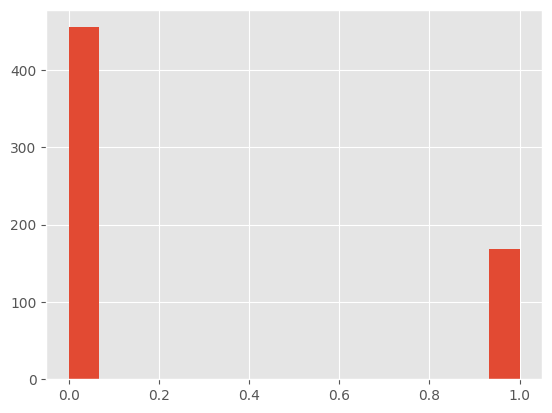

In [28]:
# This shows the data of students who are regular and irregular students 
# It shows imbalances 
plt.hist(final_dataframe['Status'], bins = 15)
plt.show()

c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Computer\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.6

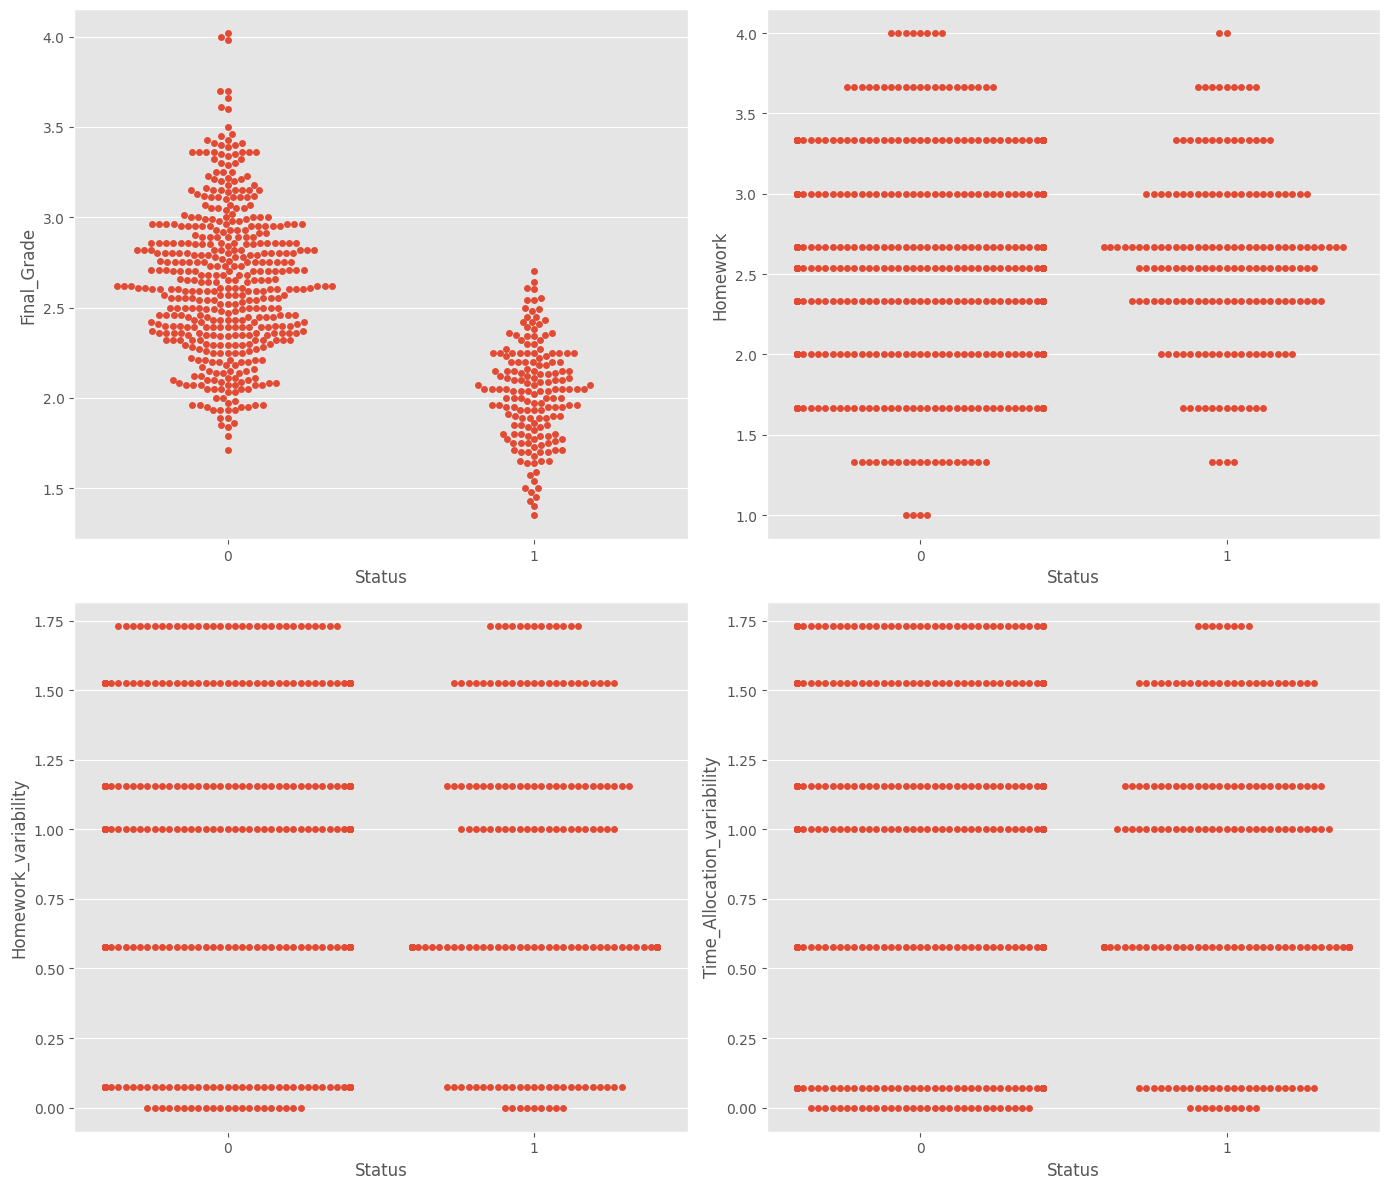

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.swarmplot(ax=axes[0, 0], x='Status', y='Final_Grade', data=final_dataframe)
sns.swarmplot(ax=axes[0, 1], x='Status', y='Homework', data=merged_data)
sns.swarmplot(ax=axes[1, 0], x='Status', y='Homework_variability', data=merged_data)
sns.swarmplot(ax=axes[1, 1], x='Status', y='Time_Allocation_variability', data=merged_data)

plt.tight_layout()
plt.show()

Independent variables are the predictor or the features that will help us predict whether the student has probability to be a irregular student for the next semester or will probably stay as regular student based on their study habits that is gathered through the survey and final grades

Dependent variable is the target variable or what we are trying to know which is the status of the student

In [30]:
# Dependent(y) and Independent(x) Variable segregation 

x = final_dataframe.drop(['Status'], axis=1)
y = final_dataframe['Status']

In [31]:
# # Select two features from x for visualization purposes
# x_two_features = x[['Final_Grade', 'Homework_variability']]

# # Now split the data again for training and testing
# x_train, x_test, y_train, y_test = train_test_split(x_two_features, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
#Data Spliting (Training and Testing Set)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
classifier = SVC(kernel='poly')
classifier.fit(x_train, y_train)

SVC(kernel='poly')

In [34]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [35]:
final_dataframe.columns

Index(['Year', 'Final_Grade', 'Subjects_Failed', 'Homework', 'Time_Allocation',
       'Reading_and_Note_Taking', 'Study_Period_Procedures',
       'Written_Works_Question', 'Examination_Question',
       'Teachers_Consultation', 'Homework_variability',
       'Time_Allocation_variability', 'Reading_and_Note_Taking_variability',
       'Study_Period_Procedures_variability',
       'Written_Works_Question_variability',
       'Examination_Question_variability', 'Teachers_Consultation_variability',
       'Status'],
      dtype='object')

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x)


In [40]:
X_poly

array([[1.00000000e+00, 1.84000000e+00, 0.00000000e+00, ...,
        2.33333333e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 2.20000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.77350269e-01, 3.33333333e-01],
       [4.00000000e+00, 1.80000000e+00, 0.00000000e+00, ...,
        2.33333333e+00, 2.33333333e+00, 2.33333333e+00],
       ...,
       [2.00000000e+00, 3.15000000e+00, 4.00000000e+00, ...,
        9.97773924e-04, 2.06411931e-03, 4.27009409e-03],
       [1.00000000e+00, 3.36000000e+00, 2.00000000e+00, ...,
        9.97773924e-04, 2.06411931e-03, 4.27009409e-03],
       [2.00000000e+00, 1.95000000e+00, 1.00000000e+00, ...,
        9.97773924e-04, 2.06411931e-03, 4.27009409e-03]])

In [42]:
from sklearn.decomposition import PCA
import plotly.express as px 

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_poly)
final_dataframe['PC1'] = X_pca[:, 0]
final_dataframe['PC2'] = X_pca[:, 1]
final_dataframe['PC3'] = X_pca[:, 2]

fig = px.scatter_3d(final_dataframe, x='PC1', y='PC2', z='PC3', color='Status')
fig.show()


In [38]:
y

0      1
1      1
2      1
3      0
4      0
      ..
619    1
620    0
621    0
622    0
623    0
Name: Status, Length: 624, dtype: int64

In [39]:
import plotly.express as px 

fig = px.scatter_3d(final_dataframe, x='Final_Grade_Sqr', y= 'Written_Works_Question_Sqr', z= 'productOfAll',
                    color = 'Status')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Year', 'Final_Grade', 'Subjects_Failed', 'Homework', 'Time_Allocation', 'Reading_and_Note_Taking', 'Study_Period_Procedures', 'Written_Works_Question', 'Examination_Question', 'Teachers_Consultation', 'Homework_variability', 'Time_Allocation_variability', 'Reading_and_Note_Taking_variability', 'Study_Period_Procedures_variability', 'Written_Works_Question_variability', 'Examination_Question_variability', 'Teachers_Consultation_variability', 'Status'] but received: Final_Grade_Sqr

Interpretation

High positive correlation (close to +1): Survey questions with strong agreement are likely tied to the student’s status/final grade (e.g., good performance or passing).

High negative correlation (close to -1): Strong disagreements might be linked to poorer performance or failure.

Close to 0 correlation: This means the survey question doesn’t have a strong predictive power for the Status.

In [38]:
# y_train_df = y_train.rename("Target")

# # Concatenate the feature DataFrame (x_train) with the target column (y_train_df)
# columnStatus_for_correlation = pd.concat([x_train, y_train_df], axis=1)

# # Calculate the correlation matrix
# correlation_matrix = columnStatus_for_correlation.corr()

In [39]:
# correlation_matrix

In [40]:
# plt.figure(figsize=(10,8))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 8})
# plt.xticks(rotation=45)  # Rotate x-axis labels
# plt.yticks(rotation=0)   # Rotate y-axis labels
# plt.show()

Matrix shows that final grade and subject failed strong relationship to the target variable, while the rest of the features shows weak relationship as it is near 0

TRAINING SVM MODEL 

In [41]:
# import sklearn
# from matplotlib.axes._axes import _log as matplotlib_axes_logger
# from matplotlib.colors import ListedColormap
# from mpl_toolkits import mplot3d
# from sklearn.datasets import make_classification

In [42]:
# matplotlib_axes_logger.setLevel('ERROR')

In [43]:
# zero_one_colourmap_pts = ListedColormap(('red', 'green'))
# zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90'))
     

In [44]:
# def plot_decision_boundary(x, y, clf):
#   X_set, y_set = x, y
#   X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
#                                  stop = X_set[:, 0].max() + 1, 
#                                  step = 0.01),
#                        np.arange(start = X_set[:, 1].min() - 1, 
#                                  stop = X_set[:, 1].max() + 1, 
#                                  step = 0.01))
#   plt.figure(figsize=(10,6))
#   plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
#                                              X2.ravel()]).T).reshape(X1.shape),
#                alpha = 0.75, 
#                cmap = zero_one_colourmap_boundary)
#   plt.xlim(X1.min(), X1.max())
#   plt.ylim(X2.min(), X2.max())
#   for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = (zero_one_colourmap_pts)(i), label = j)
#   plt.title('SVM Decision Boundary')
#   plt.xlabel('X1')
#   plt.ylabel('X2')
#   plt.legend()
#   return plt.show()

In [45]:
# def generate_clf(x, y, input_gamma=0.1, input_C=1):
#     classifier = SVC(kernel="poly", gamma=input_gamma, C=input_C)
#     classifier.fit(x, y.ravel())
#     y_pred = classifier.predict(x)
#     print("Training Accuracy = {}".format(accuracy_score(y_pred, y)))
#     return classifier


In [46]:
# x, y = make_classification(n_samples=200, n_features=2,
# n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,random_state=44)
     

In [47]:
# # Ensure the data is in array format for plotting
# x_train = np.asarray(x_train)
# x_test = np.asarray(x_test)
# y_train = np.asarray(y_train)
# y_test = np.asarray(y_test)

# # Example of generating the classifier
# clf = generate_clf(x_train, y_train, input_gamma=0.1)

# # Plot the decision boundary
# plot_decision_boundary(x_train, y_train, clf)

In [48]:
# classifier_1 = generate_clf(x_train, y_train, 3, 1)

# plot_decision_boundary(x_train, y_train, classifier_1)